# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [84]:
# 📚 Basic Libraries
import numpy as np # numerical python
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 


# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [85]:
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [86]:
for i in diabetes.keys():
    print(i)

data
target
frame
DESCR
feature_names
data_filename
target_filename
data_module


#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [87]:
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

1. there are 10 attributes: age, sex, bmi, average blood pressure, 6 blood serum measurements. nr 11 is disease progression after one year, can be interpreted as target.  

2. data is used to train the ML model, target is the response
3. we have 442 entries

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [88]:
df = pd.DataFrame(data=diabetes["data"], columns=diabetes["feature_names"])
df["target"] = diabetes["target"]
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [89]:
from sklearn import linear_model

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [90]:
diabetes_model = linear_model.LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [91]:
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(diabetes["data"], diabetes["target"], test_size=20, random_state=42)

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [92]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

In [93]:
diabetes_model.coef_

array([   0.88135058, -260.26547413,  536.46965804,  335.9950993 ,
       -835.78537996,  465.75983085,  136.20013901,  245.06432031,
        712.32537762,   64.48680278])

In [94]:
diabetes_model.intercept_

151.3820926783504

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [95]:
predictions = diabetes_model.predict(diabetes_data_test)

#### Print your `diabetes_target_test` and compare with the prediction. 

In [96]:
diabetes_target_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275.])

In [97]:
predictions

array([141.94619731, 176.31674205, 134.53159785, 287.22526514,
       122.58042918,  96.46043898, 256.8468282 , 184.79870459,
        92.90893919, 111.3914492 ,  98.52709941, 166.01405738,
        58.45723061, 205.10018437, 100.72748232, 130.33505833,
       218.45993591, 245.87432278, 193.00193698, 214.38106404])

#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

no

In [98]:
eval_df = pd.DataFrame({"actual":diabetes_target_test,"pred":predictions})
eval_df

,actual,pred
0,219.0,141.946197
1,70.0,176.316742
2,202.0,134.531598
3,230.0,287.225265
4,111.0,122.580429
5,84.0,96.460439
6,242.0,256.846828
7,272.0,184.798705
8,94.0,92.908939
9,96.0,111.391449


In [99]:
r2_3 = r2_score(diabetes_target_test, predictions)
RMSE_3 = mean_squared_error(diabetes_target_test, predictions, squared=False)
MSE_3 = mean_squared_error(diabetes_target_test, predictions)
MAE_3 = mean_absolute_error(diabetes_target_test, predictions)

print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.5049
RMSE =  57.6625
MSE =   3324.9588
MAE =  47.4743


In [100]:
import xgboost as xgb

In [101]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(diabetes_data_train, diabetes_target_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [102]:
predictions_xgb = xgbr.predict(diabetes_data_test)

In [103]:
r2_3_6 = r2_score(diabetes_target_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(diabetes_target_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(diabetes_target_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(diabetes_target_test, predictions_xgb)

print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.5957
RMSE =  52.1113
The value of the metric MSE is  2715.5838
MAE =  42.9502


In [104]:
num_corr = round(df.corr(), 2)

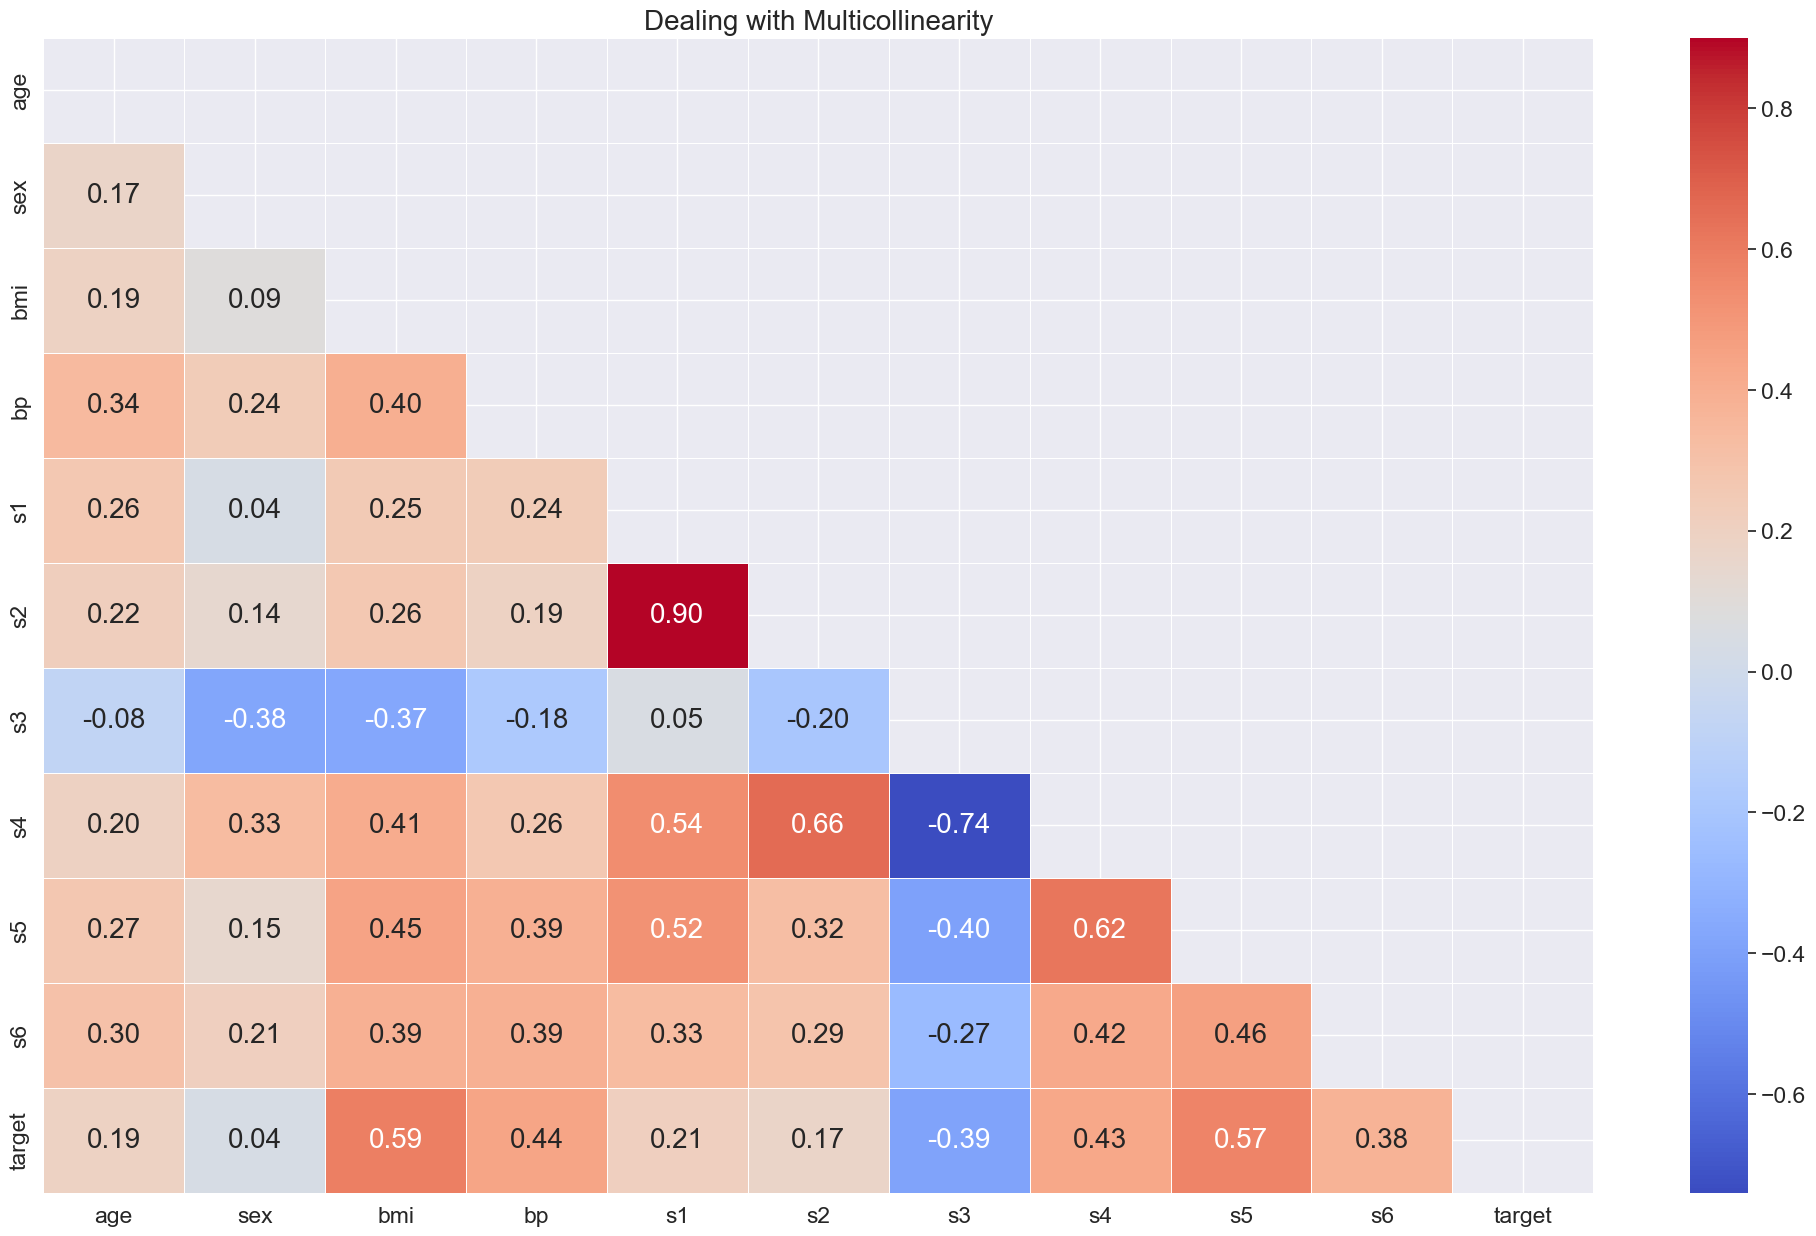

In [105]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 20}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [106]:
df = df.drop(columns=["age", "sex", "s1", "s2", "s3", "s4", "s6"])
df

,bmi,bp,s5,target
0,0.061696,0.021872,0.019907,151.0
1,-0.051474,-0.026328,-0.068332,75.0
2,0.044451,-0.005670,0.002861,141.0
3,-0.011595,-0.036656,0.022688,206.0
4,-0.036385,0.021872,-0.031988,135.0
...,...,...,...,...
437,0.019662,0.059744,0.031193,178.0
438,-0.015906,-0.067642,-0.018114,104.0
439,-0.015906,0.017293,-0.046883,132.0
440,0.039062,0.001215,0.044529,220.0


In [107]:
X = df.drop("target", axis=1)
y = df["target"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

In [109]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
predictions_lin = linear.predict(X_test)

In [110]:
r2_3 = r2_score(y_test, predictions_lin)
RMSE_3 = mean_squared_error(y_test, predictions_lin, squared=False)
MSE_3 = mean_squared_error(y_test, predictions_lin)
MAE_3 = mean_absolute_error(y_test, predictions_lin)

print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.5575
RMSE =  54.5138
MSE =   2971.7573
MAE =  44.7422


In [111]:
import xgboost as xgb
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)
predictions_xgb2 = xgbr.predict(X_test)

r2_3_6 = r2_score(y_test, predictions_xgb2)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb2, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb2)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb2)

print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.569
RMSE =  53.8026
The value of the metric MSE is  2894.7214
MAE =  44.5917


# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [ ]:
# Your code here:


Look at the first 5 rows using the `head()` function:

In [ ]:
# Your code here:


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [ ]:
# Your code here:


What is the newest model year and the oldest model year?

In [ ]:
# Your code here:


Check the dataset for missing values and remove all rows containing at least one missing value.

In [ ]:
# Your code here:


Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [ ]:
# Your code here:


We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [ ]:
# Your code here:


Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [ ]:
# Your code here:


# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](https://en.wikipedia.org/wiki/Coefficient_of_determination). In the end, we want the r-squared score to be as high as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [ ]:
# Your code here:


#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [ ]:
# Your code here:


#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [ ]:
# Your code here:


Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [ ]:
# Your code here:


Compute the predicted values and r squared score for our new model and new sample data.

In [ ]:
# Your code here:


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [ ]:
# Your code here:


# Bonus Challenge - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [ ]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [ ]:
# Your code here:


Fit the model and print the ranking

In [ ]:
# Your code here:


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [ ]:
# Your code here:


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [ ]:
# Your code here: 


#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.